# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Each time this cell is run different sets of latitudes and longitudes are generated.

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_name = []
city_data = []
city_lat = []
city_lon = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
units = "imperial"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&APPID={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lon.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | yaren
Processing Record 4 of Set 1 | whakatane
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | codajas
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | palu
Processing Record 9 of Set 1 | alaghsas
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | gilgit
Processing Record 15 of Set 1 | tomatlan
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | kolonia
Processing Record 18 of Set 1 | buea
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | makurazaki
Processing Record 21 of Set 1 | bethanie
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 2

Processing Record 40 of Set 4 | kataragama
City not found. Skipping...
Processing Record 41 of Set 4 | island harbour
Processing Record 42 of Set 4 | zhangatas
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | punta arenas
Processing Record 45 of Set 4 | iskateley
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | miri
Processing Record 48 of Set 4 | tsiombe
Processing Record 49 of Set 4 | den burg
Processing Record 0 of Set 5 | fale old settlement
Processing Record 1 of Set 5 | lytham st annes
Processing Record 2 of Set 5 | rudbar
Processing Record 3 of Set 5 | ringkobing
Processing Record 4 of Set 5 | afif
Processing Record 5 of Set 5 | ingeniero jacobacci
Processing Record 6 of Set 5 | kaga bandoro
Processing Record 7 of Set 5 | villa la angostura
Processing Record 8 of Set 5 | xining
Processing Record 9 of Set 5 | robertsport
Processing Record 10 of Set 5 | ola
Processing Record 11 of Set 5 | minas de marcona
Processing Record 12 of Set 5 | ci

Processing Record 31 of Set 8 | bandar lampung
Processing Record 32 of Set 8 | kerikeri
Processing Record 33 of Set 8 | takaungu
Processing Record 34 of Set 8 | brumunddal
Processing Record 35 of Set 8 | sungailiat
Processing Record 36 of Set 8 | salalah
Processing Record 37 of Set 8 | charcas
Processing Record 38 of Set 8 | santa elena de uairen
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | dakhla
Processing Record 41 of Set 8 | mayfield
Processing Record 42 of Set 8 | uusikaupunki
Processing Record 43 of Set 8 | hotan
Processing Record 44 of Set 8 | nova sintra
Processing Record 45 of Set 8 | kampung sungai ara
Processing Record 46 of Set 8 | fort st. john
Processing Record 47 of Set 8 | i-n-salah
Processing Record 48 of Set 8 | pimentel
Processing Record 49 of Set 8 | macapa
Processing Record 0 of Set 9 | motygino
Processing Record 1 of Set 9 | sosenskiy
Processing Record 2 of Set 9 | tanjung selor
City not found. Skipping...
Processing Record 3 of Set 9 |

Processing Record 21 of Set 12 | oudtshoorn
Processing Record 22 of Set 12 | kuching
Processing Record 23 of Set 12 | torre de moncorvo
Processing Record 24 of Set 12 | loango
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | giresun
Processing Record 27 of Set 12 | golpazari
Processing Record 28 of Set 12 | morant bay
Processing Record 29 of Set 12 | kyzyl
Processing Record 30 of Set 12 | tsiroanomandidy
Processing Record 31 of Set 12 | bairnsdale
Processing Record 32 of Set 12 | al badari
Processing Record 33 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 34 of Set 12 | olyokminsk
Processing Record 35 of Set 12 | kencong
Processing Record 36 of Set 12 | fortuna
Processing Record 37 of Set 12 | pacasmayo
Processing Record 38 of Set 12 | kone
Processing Record 39 of Set 12 | havre
Processing Record 40 of Set 12 | maragogi
Processing Record 41 of Set 12 | wynyard
Processing Record 42 of Set 12 | ramadi
Processing Record 43 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    Adamstown -25.0660 -130.1015     72.09        87          98       28.10   
1     Waitangi -43.9535 -176.5597     47.82        96         100        1.99   
2        Yaren  -0.5472  166.9160     82.40        72          93        7.87   
3    Whakatane -37.9585  176.9854     39.78        99          16        5.91   
4  Port Alfred -33.5906   26.8910     61.18        86          96        4.00   

  Country        Date  
0      PN  1691513707  
1      NZ  1691513707  
2      NR  1691513707  
3      NZ  1691513707  
4      ZA  1691513707

In [6]:
# Export the City_Data into a csv
os.makedirs("output_data", exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0          Adamstown -25.0660 -130.1015     72.09        87          98   
1           Waitangi -43.9535 -176.5597     47.82        96         100   
2              Yaren  -0.5472  166.9160     82.40        72          93   
3          Whakatane -37.9585  176.9854     39.78        99          16   
4        Port Alfred -33.5906   26.8910     61.18        86          96   

         Wind Speed Country        Date  
City_ID                                  
0             28.10      PN  1691513707  
1              1.99      NZ  1691513707  
2              7.87      NR  1691513707  
3              5.91      NZ  1691513707  
4              4.00      ZA  1691513707

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

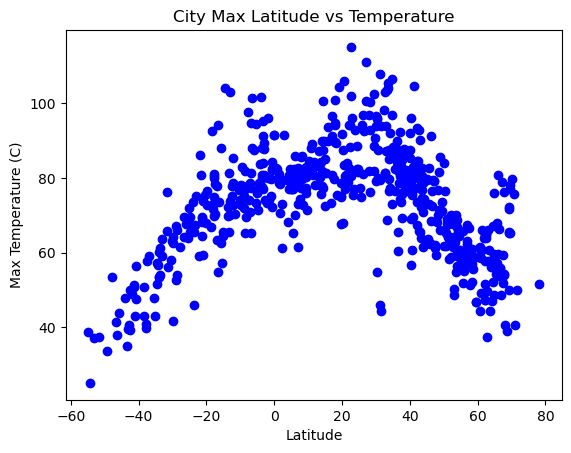

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_lat,city_max_temp, marker="o", color="blue")
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

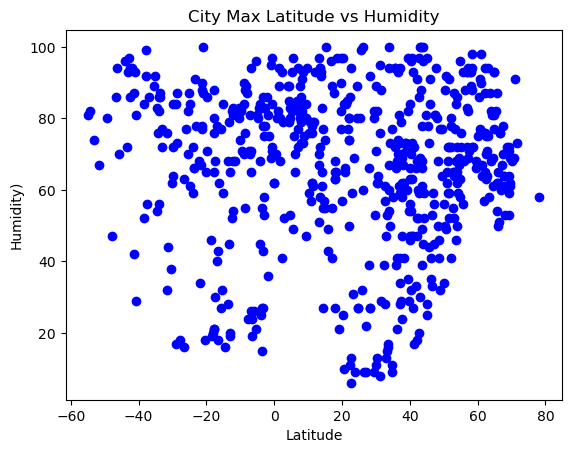

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_lat,city_humidity, marker="o", color="blue")
plt.title("City Max Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity)")

plt.show()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

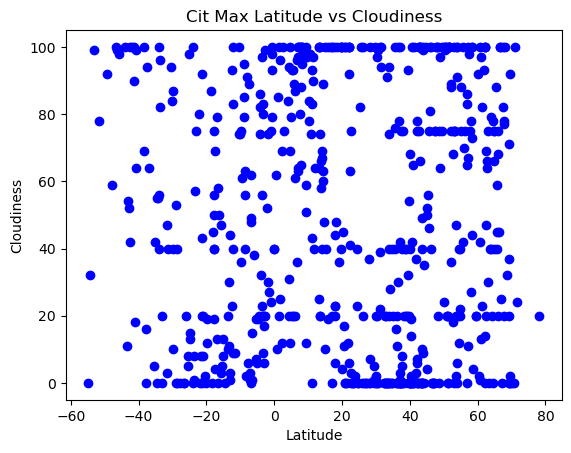

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_lat,city_clouds, marker="o", color="blue")
plt.title("Cit Max Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

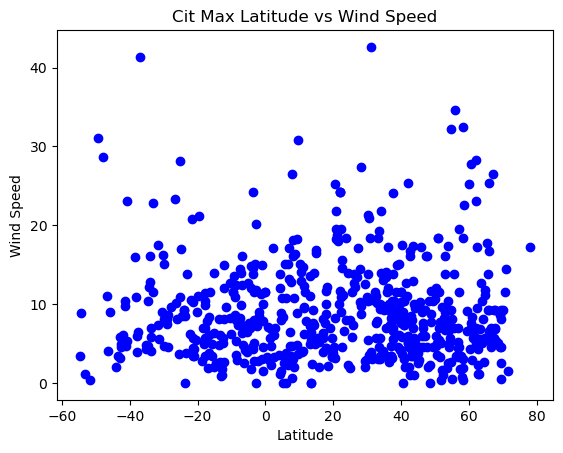

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_lat,city_wind, marker="o", color="blue")
plt.title("Cit Max Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Perform a linear regression
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept

# Define a function to create Linear Regression plots
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                       
6                Iqaluit  63.7506  -68.5145     44.33        87          40   
8               Alaghsas  17.0187    8.0168     96.69        41          20   
9                  Sitka  57.0531 -135.3300     57.09        94         100   
11               Klyuchi  52.2667   79.1667     69.39        41          36   
12       L치zaro C치rdenas  17.9583 -102.2000     89.73        63          23   

         Wind Speed Country        Date  
City_ID                                  
6             12.66      CA  1691513707  
8              5.75      NE  1691513708  
9             11.50      US  1691513708  
11             1.03      RU  1691513708  
12             4.38      MX  1691513708

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0          Adamstown -25.0660 -130.1015     72.09        87          98   
1           Waitangi -43.9535 -176.5597     47.82        96         100   
2              Yaren  -0.5472  166.9160     82.40        72          93   
3          Whakatane -37.9585  176.9854     39.78        99          16   
4        Port Alfred -33.5906   26.8910     61.18        86          96   

         Wind Speed Country        Date  
City_ID                                  
0             28.10      PN  1691513707  
1              1.99      NZ  1691513707  
2              7.87      NR  1691513707  
3              5.91      NZ  1691513707  
4              4.00      ZA  1691513707

###  Temperature vs. Latitude Linear Regression Plot

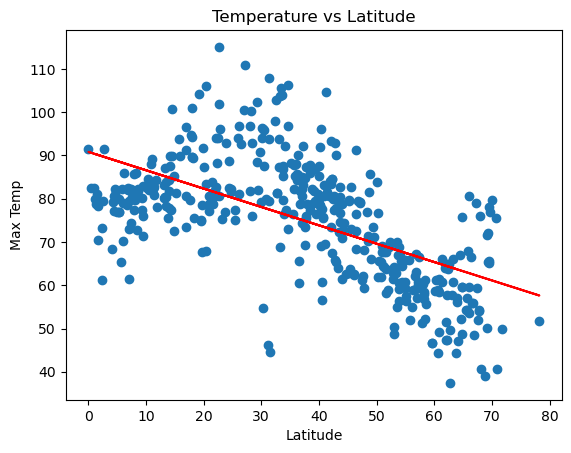

The correlation is -0.6


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Temperature vs Latitude","Max Temp", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

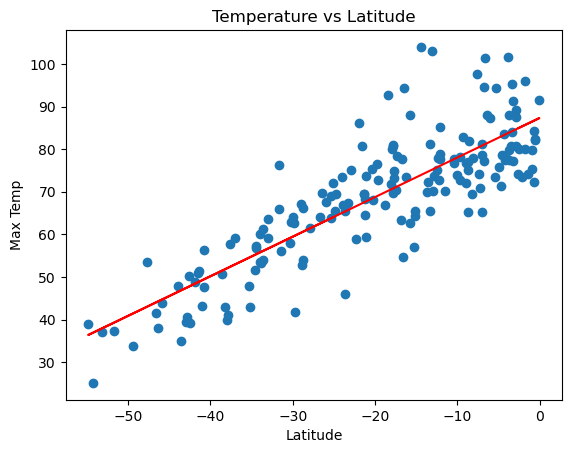

The correlation is 0.84


In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Temperature vs Latitude","Max Temp", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

**Discussion about the linear relationship:** <br>
In the northern hemisphere, there is a negative correlation between latitude and temperature. If you are father away from the equator, the temperature will be colder.
In the southern hemisphere, there is a positivte correlation between latitude and temperature. Locations along the equator have higher temperatures. 

### Humidity vs. Latitude Linear Regression Plot

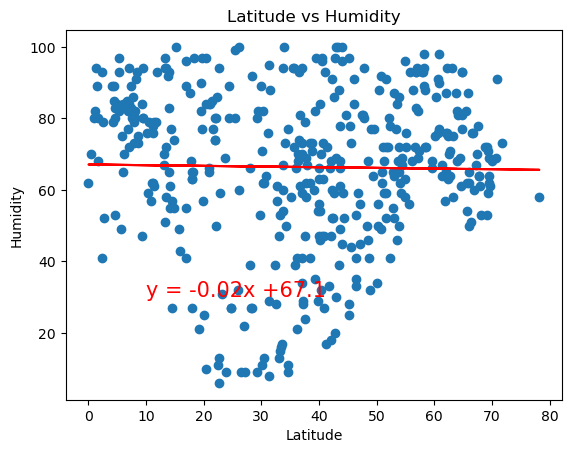

The correlation is -0.02


In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude vs Humidity","Humidity", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

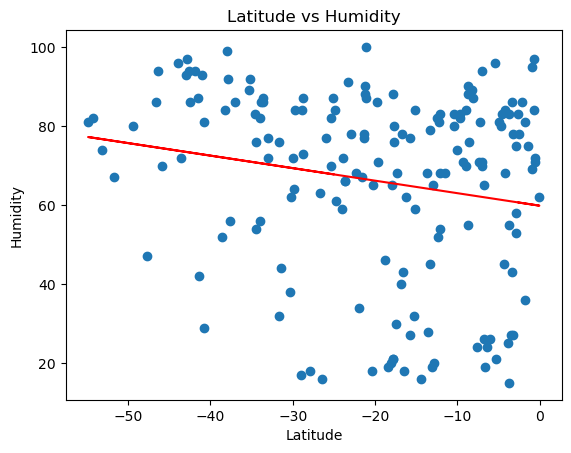

The correlation is -0.19


In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude vs Humidity","Humidity", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

**Discussion about the linear relationship:** <br>
The analysis suggests that there is not much of a relationship between humidity and latitude in both northern and southern hemispheres. The values do not follow much of a pattern. 

### Cloudiness vs. Latitude Linear Regression Plot

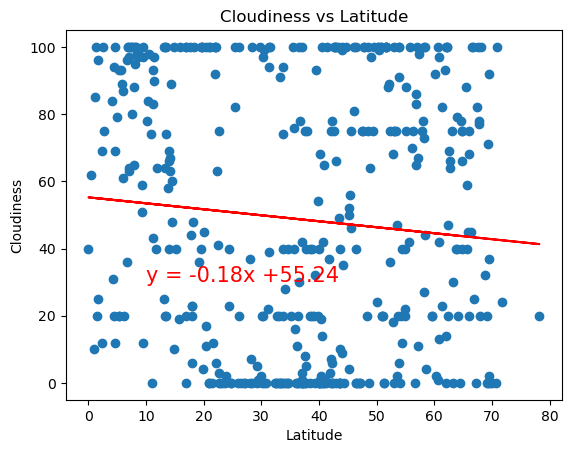

The correlation is -0.09


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude","Cloudiness", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

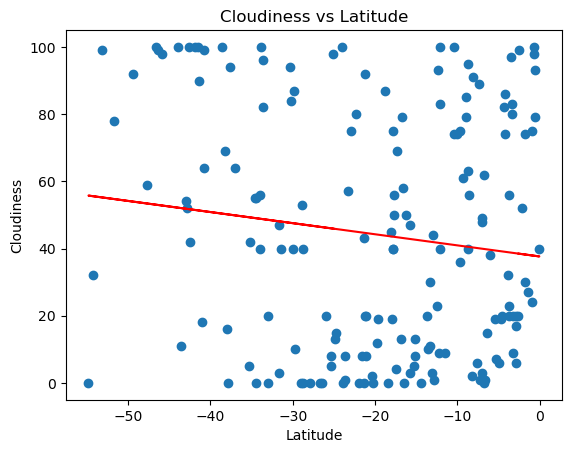

The correlation is -0.13


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Cloudiness vs Latitude","Cloudiness", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

**Discussion about the linear relationship:** <br>
The analysis suggests that there is not much of a relationship between cloudiness and latitude in both northern and southern hemispheres. Cloudiess is affected by differt factors such as precipitation and temperature. 

### Wind Speed vs. Latitude Linear Regression Plot

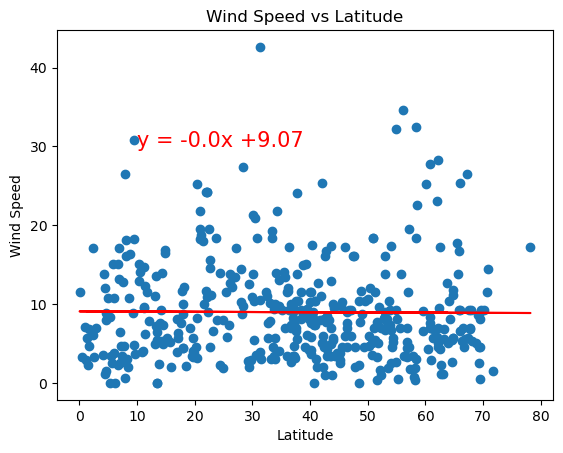

The correlation is -0.01


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude","Wind Speed", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

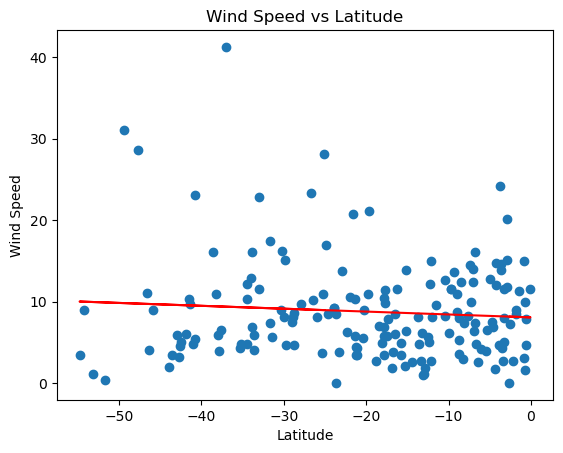

The correlation is -0.08


In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Wind Speed vs Latitude","Wind Speed", (10,30))

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation[0],2)}")

**Discussion about the linear relationship:** <br>
In both northern and southern hemispheres, there is a concentration of data points at lower wind speeds across all latitudes. Although this can be observed, there is still not a correlations between latitude and wind speed.  